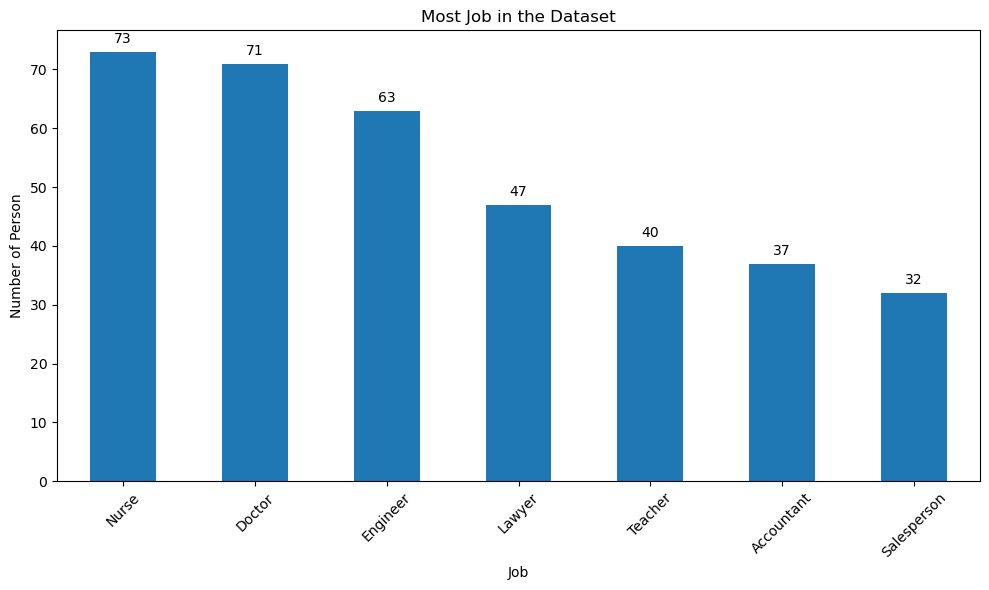

In [4]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt

# Declaration
# Exploratory Data Analysis (EDA) - 7 Most Job in the Dataset
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

# Dataset
top_context = df['Occupation'].value_counts().head(7)
    
# Bar Chart
plt.figure(figsize=(10, 6))
ax = top_context.plot(kind='bar')
# Add label
for i, value in enumerate(top_context):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.title("Most Job in the Dataset")
plt.xlabel("Job")
plt.ylabel("Number of Person")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()